## This draft contains reading of database properly

In [288]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import re

from os import walk
from os.path import join

import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imshow, show

In [3]:
# Read classes from file
labels = np.genfromtxt('../classes.csv', delimiter=',', dtype=str)
# because of space after comma we read redundant empty column
labels = np.array([l[0] for l in labels])

In [4]:
data_path = "../database/"
files = list()
for (dirpath, dirnames, filenames) in walk(data_path):
    files = filenames    

In [5]:
data_images = list()
data_labels = list()
label_from_name = r"([a-zA-z]+)[-_]\d+.pgm"

In [6]:
# here we load all the images and find their label from filename
for f in files:
    match = re.match(label_from_name, f)
    if match:
        label = match.groups()[0]
        if label in labels:
            data_labels.append(label)
            data_images.append(imread(join(data_path, f), as_grey=True))      
    else: 
        # if name does not match our regexp or label is not in the list
        # of classes - not read from database
        continue 

In [7]:
im = data_images[0]

In [8]:
data_labels[0]

'key'

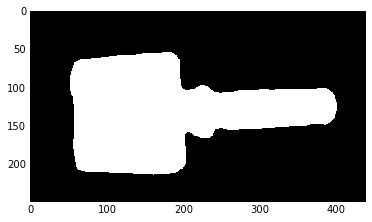

In [93]:
imshow(im)
show()

In [238]:
CONNECTIVITY_INC = {
    4: {
        0: (0, -1),
        1: (-1, 0),
        2: (0, 1),
        3: (1, 0)
    },
    8: {
        0: (0, -1),
        1: (-1, -1),
        2: (-1, 0),
        3: (-1, 1),
        4: (0, 1),
        5: (1, 1),
        6: (1, 0),
        7: (1, -1),
    }
}

In [101]:
def pad_image(im, color="b"):
    if color == "b":
        padded_im = np.array([np.concatenate([[0], row, [0]]) for row in im], dtype=np.uint8)
        new_row = np.zeros((1, padded_im.shape[1]), dtype=np.uint8)
        padded_im = np.concatenate([new_row, padded_im, new_row])
    else:
        raise ValueError("Padding is not implemented for thes color")
    return padded_im

In [293]:
def trace_border(im, connectivity=4):
    border = list()
    # we pad image by one pixel from all sides
    # padding ensures us not to go out of domain
    padded_im = pad_image(im)
    
    background_pixel = padded_im[0][0]
    current_pixel = padded_im[0][0]
    start = None
    
    # find starting pixel
    for i in range(padded_im.shape[0]):
        for j in range(padded_im.shape[1]):
            if padded_im[i][j] != current_pixel:
                start = (i, j)
                border.append((i, j))
                BB.append((i, j))
                break
        else:
            continue 
            # executed if the loop ended normally (no break)
        break 
        
    # iterations of the algo
    print(start)
    current_pixel = start
    direction = 0
    print("Start iteration of the algorithm... ")
    while (True):
        if connectivity == 8:
            i = (direction + 2) % 8
            while i != (direction + 7) % 8:
                next_pixel = (current_pixel[0] + CONNECTIVITY_INC[connectivity][i][0],
                              current_pixel[1] + CONNECTIVITY_INC[connectivity][i][1])
                if padded_im[next_pixel] != background_pixel:
                    current_pixel = next_pixel
                    border.append(current_pixel)
                    BB.append(current_pixel)
                    direction = (i + 4) % 8
                    break
                i = (i+1) % 8
        elif connectivity == 4:
            i = (direction + 1) % 4
            while i != (direction + 4) % 8:
                next_pixel = (current_pixel[0] + CONNECTIVITY_INC[connectivity][i][0],
                              current_pixel[1] + CONNECTIVITY_INC[connectivity][i][1])
                if padded_im[next_pixel] != background_pixel:
                    current_pixel = next_pixel
                    border.append(current_pixel)
                    BB.append(current_pixel)
                    direction = (i + 2) % 4
                    break
                i = (i+1) % 4
        else:
            raise ValueError("Invalid connectivity specified")
    # stop condition 
        if current_pixel == border[0]:
            break
            
    # remove padding from image (it will influence border coordinates)
    border = [(pixel[0] - 1, pixel[1] - 1) for pixel in border]
    
    return border

In [294]:
border = trace_border(im, connectivity=4)

(56, 173)
Start iteration of the algorithm... 


In [279]:
len(border)

1073

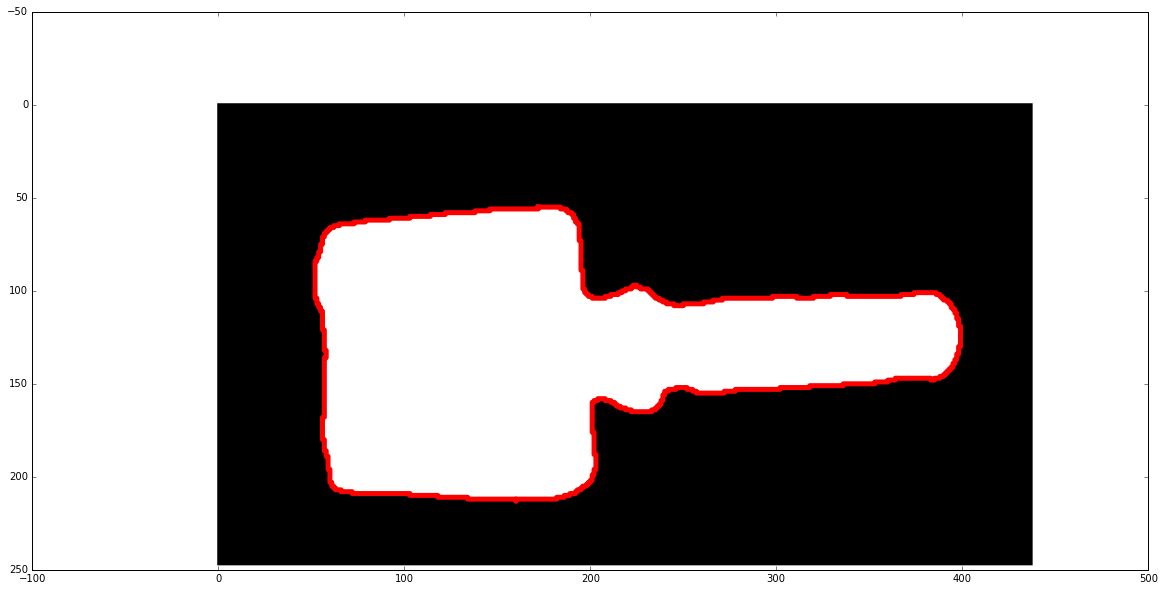

In [298]:
width = 12
height = 12
fig, ax = plt.subplots()
ax.imshow(im, cmap=plt.cm.gray)

ax.plot([b[1] for b in border], [b[0] for b in border], color="r", linewidth=5)

In [303]:
vectors = {}
for pixel in border:
    vectors.update({ pixel: []})
    for other_pixel in border:
        if other_pixel != pixel:
            vectors[pixel].append((other_pixel[0] - pixel[0],
                                   other_pixel[1] - pixel[1]))

In [307]:
pixel1_x = [vector[0] for vector in vectors[border[0]]]
pixel1_y = [vector[1] for vector in vectors[border[0]]]

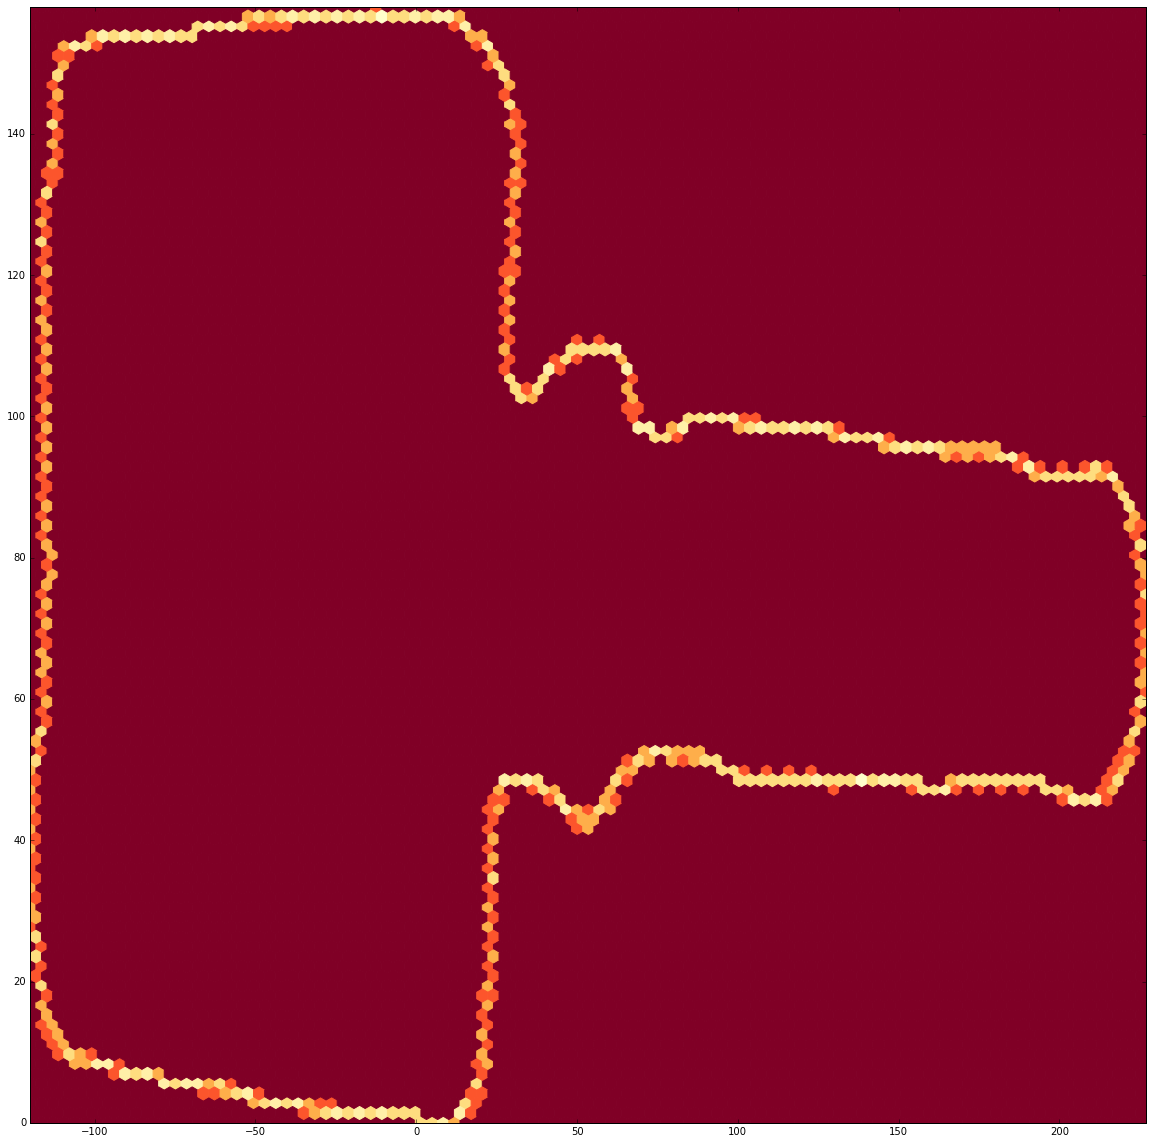

In [317]:
plt.hexbin(pixel1_y, pixel1_x, bins='log', cmap=plt.cm.YlOrRd_r)
plt.figure(figsize=(4,4))
show()

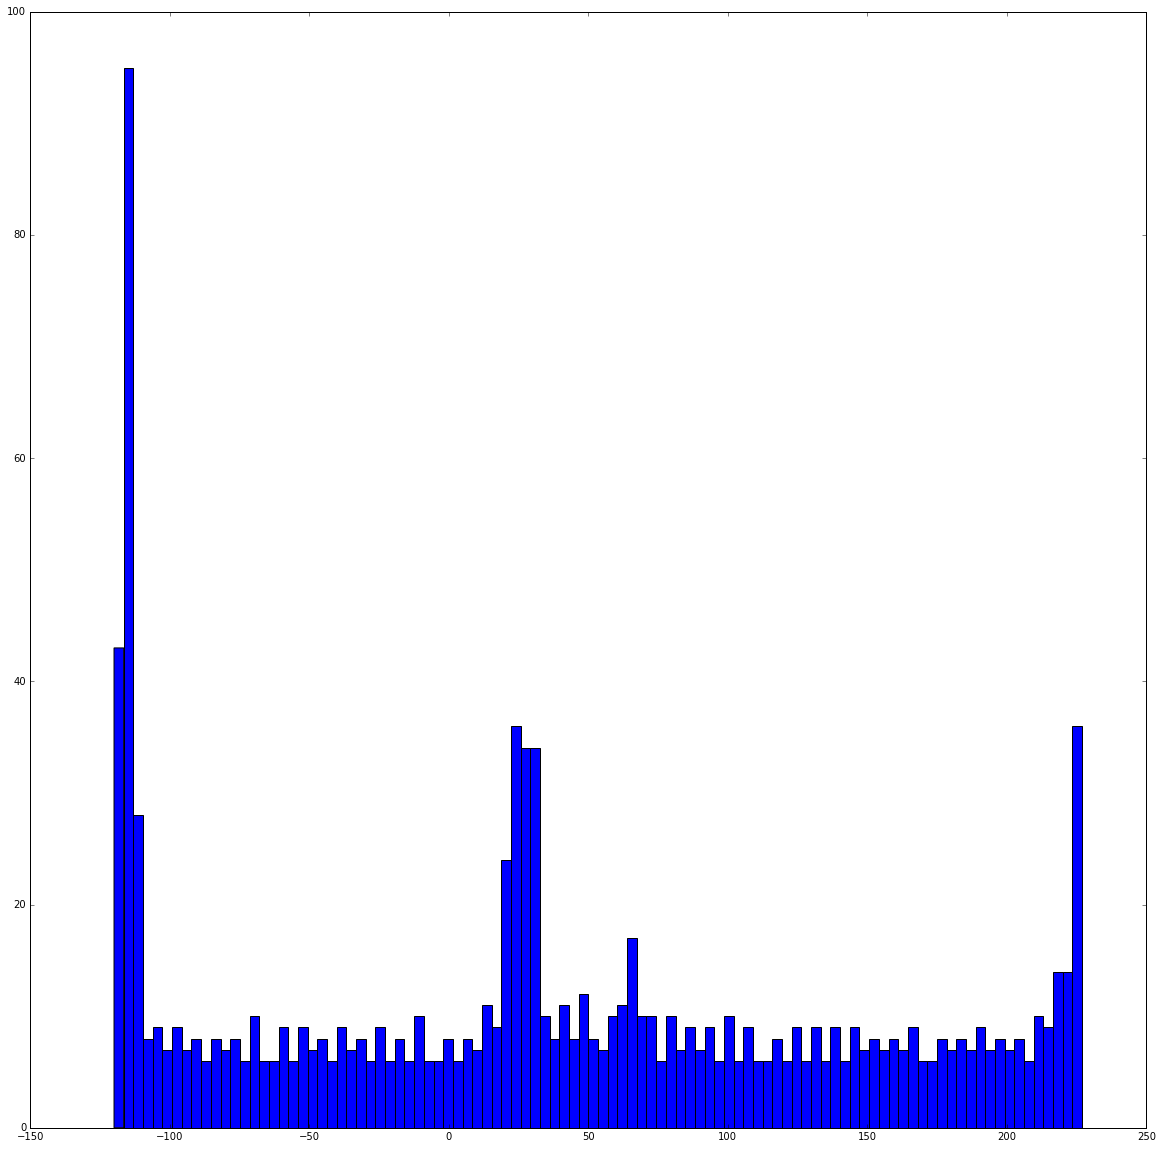

In [313]:
plt.hist(pixel1_y, bins=100)
show()

In [319]:
import skfmm
phi = np.ones((3, 3))
phi[1, 1] = -1
skfmm.distance(phi)

array([[ 1.20710678,  0.5       ,  1.20710678],
       [ 0.5       , -0.35355339,  0.5       ],
       [ 1.20710678,  0.5       ,  1.20710678]])

In [344]:
d = skfmm.distance(im, dx=1e-2)

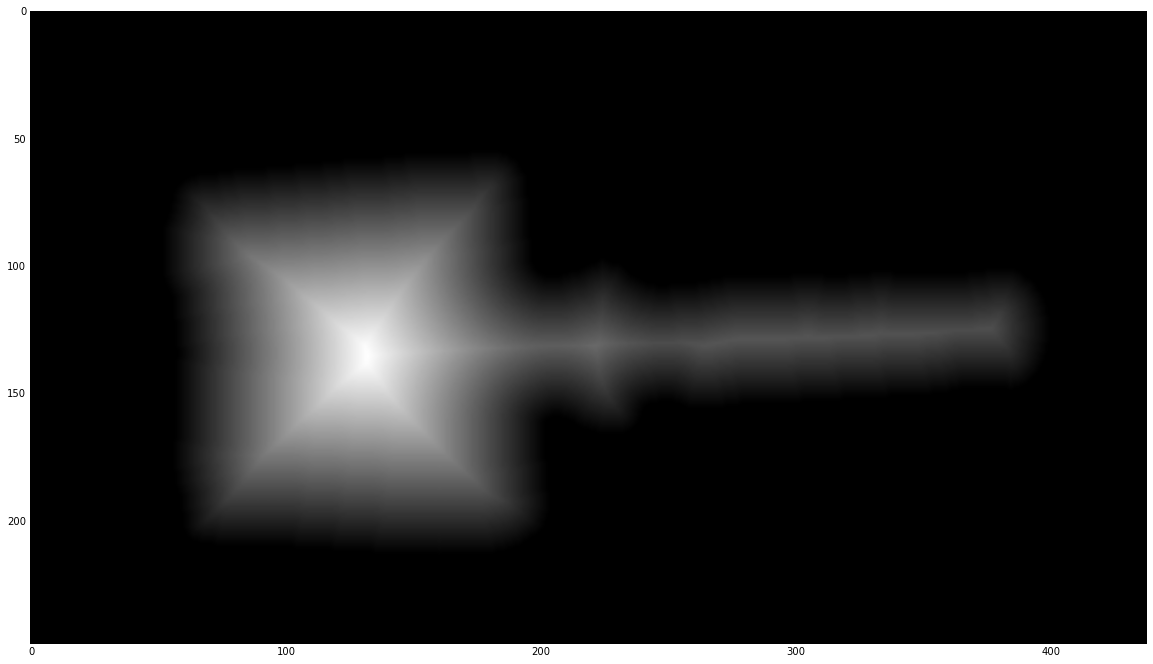

In [345]:
imshow(d, cmap=plt.cm.gray)

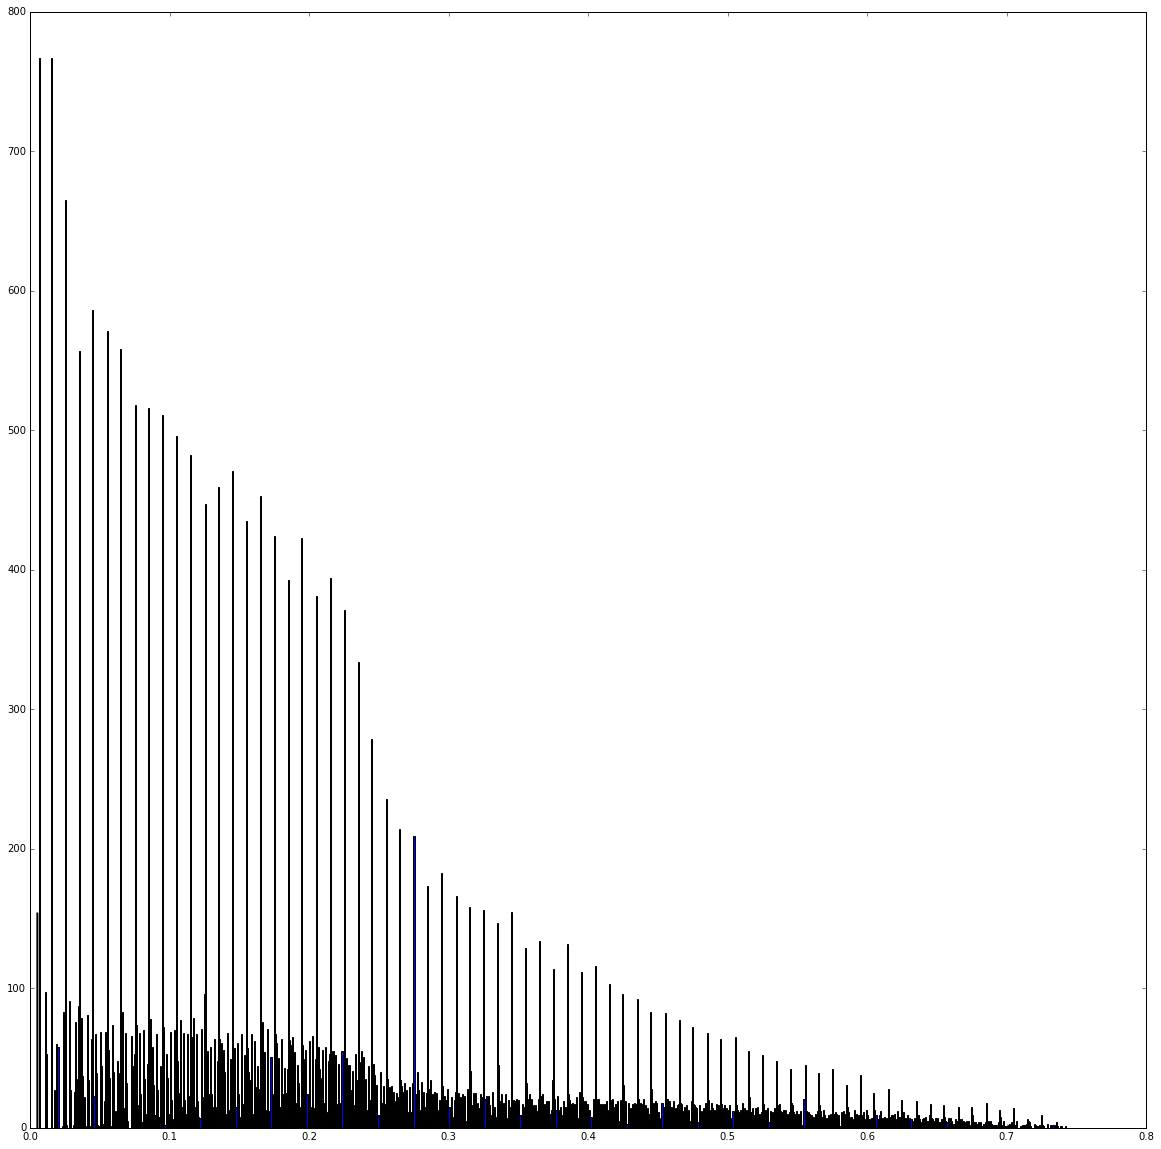

In [356]:
distances = d.flatten()
plt.hist(distances[distances != 0], bins=1000)
show()

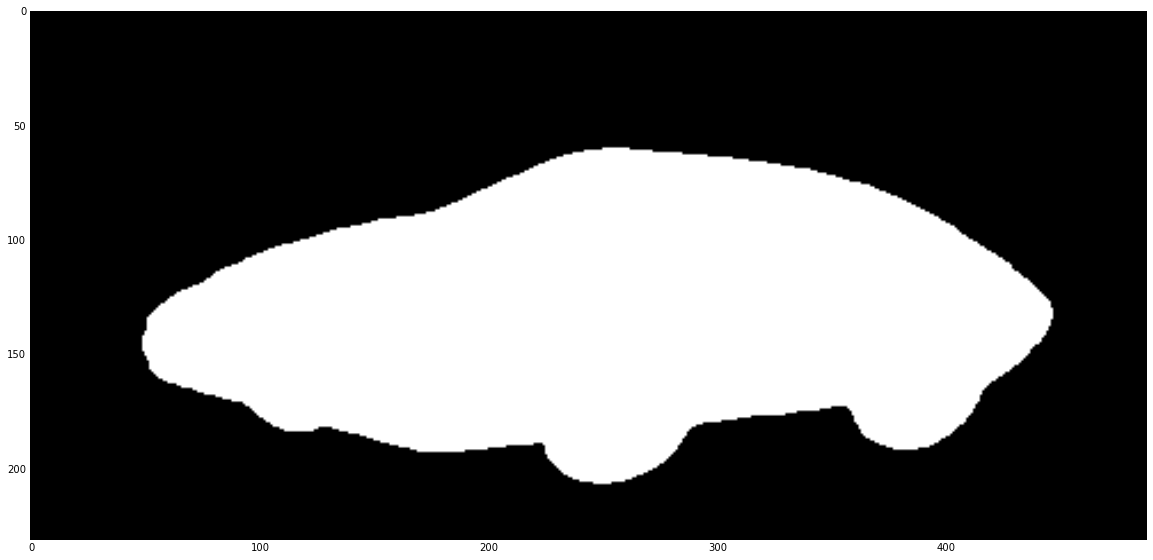

In [359]:
im2 = data_images[1]
imshow(im2, cmap=plt.cm.gray)
show()

In [360]:
border2 = trace_border(im2, connectivity=4)

(61, 251)
Start iteration of the algorithm... 


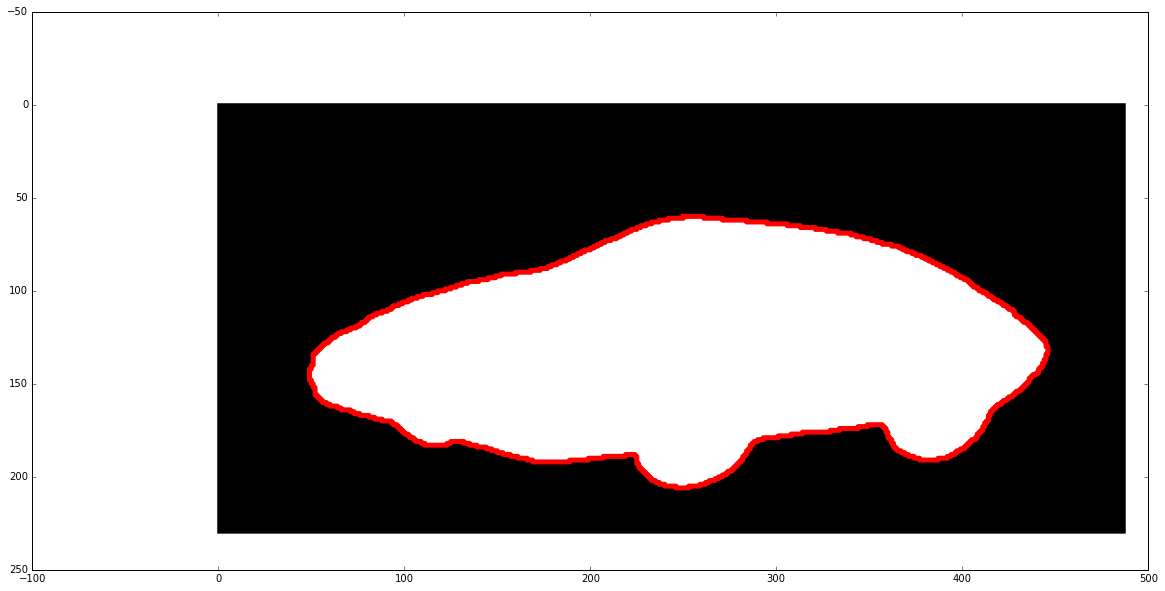

In [361]:
width = 12
height = 12
fig, ax = plt.subplots()
ax.imshow(im2, cmap=plt.cm.gray)

ax.plot([b[1] for b in border2], [b[0] for b in border2], color="r", linewidth=5)

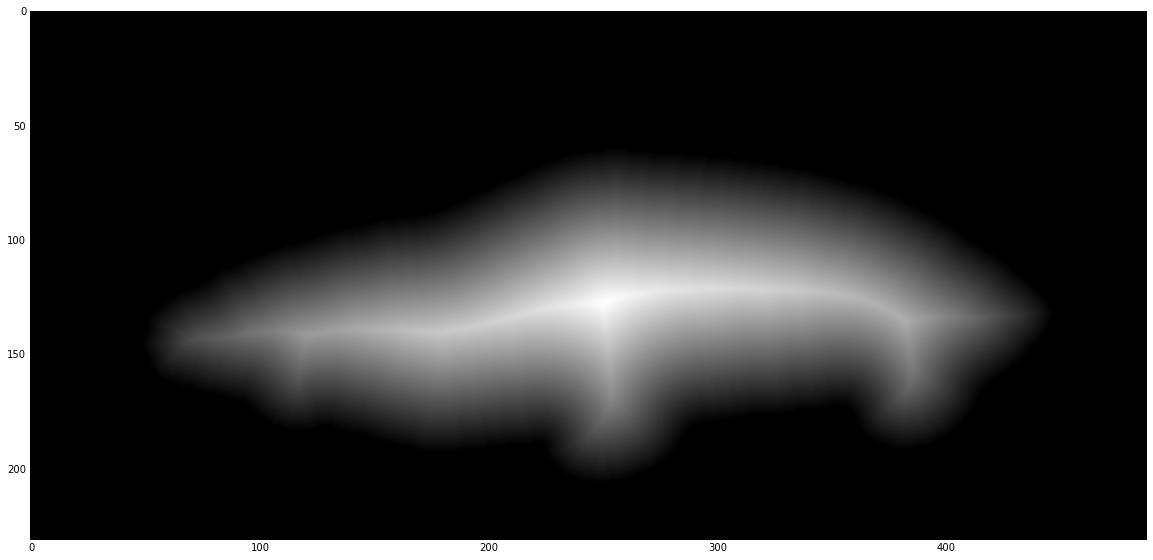

In [363]:
d2 = skfmm.distance(im2, dx=1e-2)
imshow(d2, cmap=plt.cm.gray)
show()

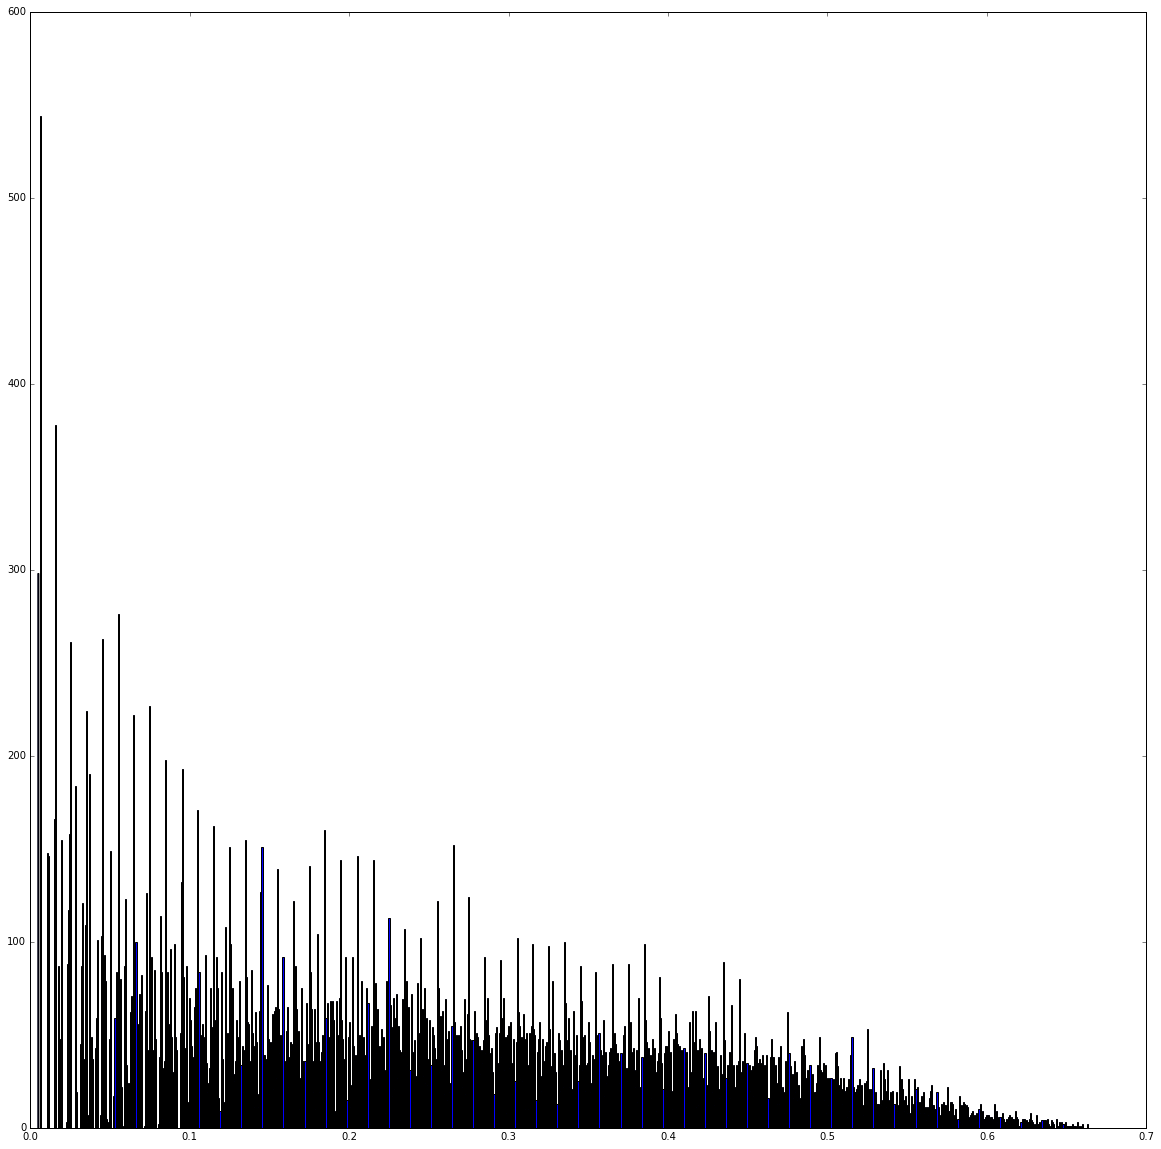

In [364]:
distances2 = d2.flatten()
plt.hist(distances2[distances2 != 0], bins=1000)
show()

In [382]:
?np.histogram

In [381]:
numpy.histogram(distances2, bins=50, weights=distances2)

(array([   8.36096904,   29.35488881,   37.57241745,   48.85135005,
          79.91915361,   81.59887399,   92.12762744,  127.42002975,
         119.29090099,  134.84668428,  168.6576356 ,  160.3697394 ,
         162.22747777,  203.82968354,  197.56848162,  210.47270757,
         232.4614628 ,  226.96328471,  233.23510541,  253.87691066,
         260.92837398,  251.24801031,  274.43818927,  281.96337383,
         281.41736918,  272.76056136,  316.55353181,  280.5506372 ,
         286.54979396,  325.5991656 ,  297.23346164,  288.36847904,
         323.98389113,  290.22207501,  279.90887356,  287.17333014,
         255.70687187,  236.65839693,  252.18886983,  219.05967417,
         181.54156202,  178.83456314,  140.37774306,  115.32372246,
         100.27685517,   76.05474885,   54.2683475 ,   42.82831672,
          28.2929324 ,   12.46329775]),
 array([ 0.        ,  0.0132642 ,  0.0265284 ,  0.03979261,  0.05305681,
         0.06632101,  0.07958521,  0.09284942,  0.10611362,  0.11937782

In [377]:
bin_means = (numpy.histogram(distances2, bins=50)[0] /
             numpy.histogram(distances2, bins=50)[0])

In [383]:
from scipy import interpolate

In [441]:
# sample points from the border
sample_indices = np.sort(numpy.random.choice(range(len(border)), size = 400))
sampled_border = [p for i, p in enumerate(border) if i in sample_indices]

In [445]:
?ax.plot

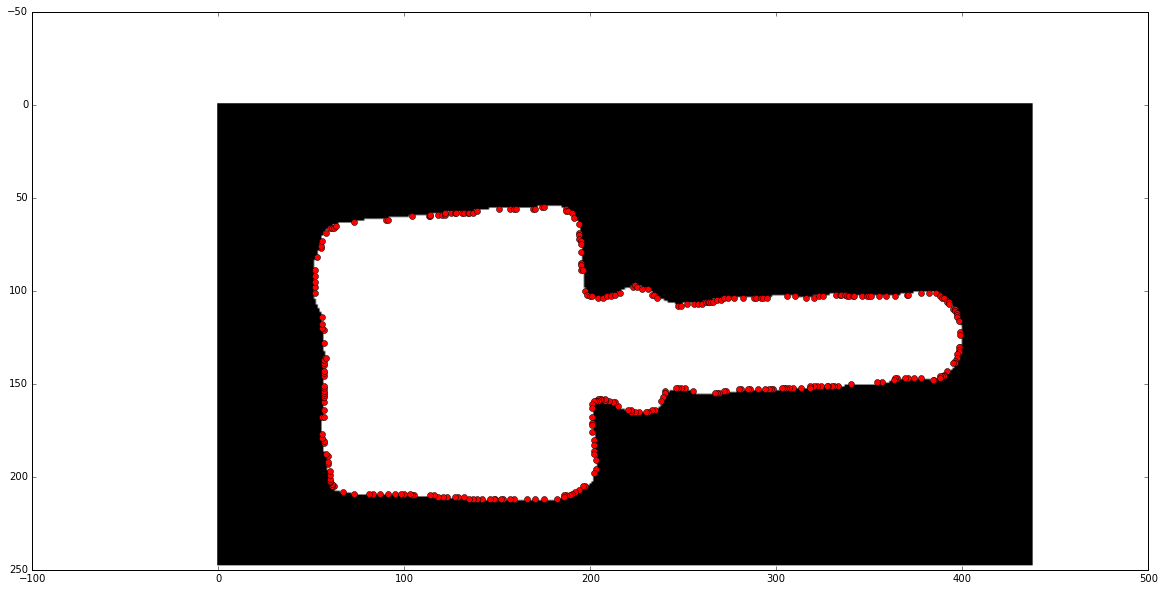

In [446]:
width = 12
height = 12
fig, ax = plt.subplots()
ax.imshow(im, cmap=plt.cm.gray)

ax.plot([b[1] for b in sampled_border], [b[0] for b in sampled_border], "ro", linewidth=1)

In [466]:
w = 5
i = 5
first_ders = []
second_ders = []
while (i != len(border) - 5):
    
    window = [border[i-5],
              border[i-4],
              border[i-3],
              border[i-2],
              border[i-1],
              border[i],
              border[i+1],
              border[i+2],
              border[i+3],
              border[i+4],
              border[i+5]]
    x = [p[1] for p in window]
    y = [p[0] for p in window]
    print(x)
    print(y)
    try:
        tck = interpolate.splrep(x, y, s=3)
        xnew = np.arange(min(x), max(x)+1, step=0.1)
        ynew = interpolate.splev(xnew, tck, der=0)
        first_der = interpolate.splev(border[i][1], tck, der=1)
        second_der = interpolate.splev(border[i][1], tck, der=2)

        if not np.isnan(first_der):
            first_ders.append(first_der)

        if not np.isnan(second_der):
            second_ders.append(second_der)

        print("First der: %f" % first_der)
        print("Second der: %f" % second_der)
    except ValueError:
        pass
        
    
#     plt.figure()
#     plt.plot(x, y, 'x', xnew, ynew)
#     plt.legend(['Linear', 'Cubic Spline'])
#     plt.title('Cubic-spline interpolation')
# #     plt.ylim()
#     plt.show()

    
    i += 1

[172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182]
[55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
First der: 0.000000
Second der: 0.000000
[173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]
[55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
First der: 0.000000
Second der: 0.000000
[174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184]
[55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
First der: 0.000000
Second der: 0.000000
[175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 184]
[55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56]
First der: -0.019811
Second der: 0.038344
[176, 177, 178, 179, 180, 181, 182, 183, 184, 184, 185]
[55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56]
First der: 0.010191
Second der: 0.073619
[177, 178, 179, 180, 181, 182, 183, 184, 184, 185, 186]
[55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56]
First der: 0.118508
Second der: 0.061474
[178, 179, 180, 181, 182, 183, 184, 184, 185, 186, 187]
[55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56]
First der: 0.217198
Second der: 0.028893
[179,

/home/johnpaul/anaconda/envs/venv/lib/python3.5/site-packages/scipy/interpolate/fitpack.py:512: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/home/johnpaul/anaconda/envs/venv/lib/python3.5/site-packages/scipy/interpolate/fitpack.py:512: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


In [467]:
len(border)

1073

In [468]:
len(first_ders)

370

In [299]:
def indexing(data):
    """This function vectorizes the images with our implemented indexing method."""
#   here we can include contour finding
#   and all other things we do to find img description
#   should return np.appay that is of the same size (?) for all images
#   and each row represents image features
#   so later we can just pass it to the classifier 
    pass

In [110]:
# Later we would do:

In [106]:
# X = indexing(data_images)
# y = np.array(data_labels)

In [109]:
# clf = OneVsRestClassifier(GaussianNB())
# clf.fit(X, y)